# Arabic handwritten word recognition

<img src="arabic segementation words.jpg">

<img src="Text-line image preprocessing steps.jpg">

<img src="Output of segmentation stage.jpg">

<img src="Example of over-segmentation problems.jpg">

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

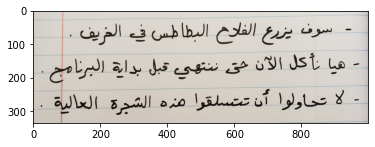

In [5]:
img = cv2.imread('arabic-handwriting-4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
    
plt.imshow(img)

### Line segmentation

In [6]:
def thresholding(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

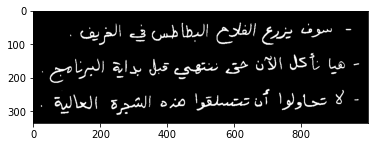

In [7]:
thresh_img = thresholding(img)

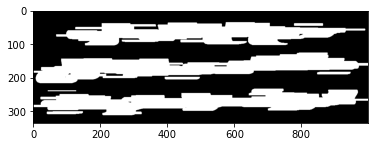

In [10]:
# dilation
kernel = np.ones((3, 85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray')

In [11]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [12]:
sorted_contours_lines = sorted(contours, key= lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

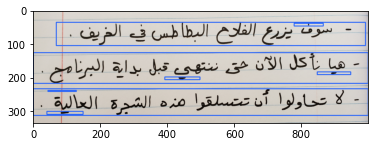

In [13]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x, y), (x+w, y+h), (40, 100, 250), 2)

plt.imshow(img2)

### Text segmentation

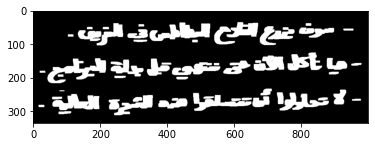

In [15]:
# dilation
kernel = np.ones((3, 15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray')

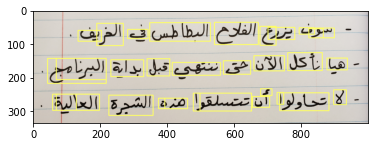

In [33]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])
    
    for word in sorted_contour_words:
        
        if cv2.contourArea(word) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)
        
plt.imshow(img3)

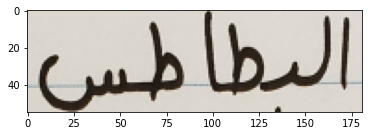

In [24]:
ninth_word = words_list[8]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

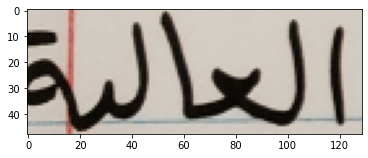

In [25]:
ninth_word = words_list[0]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

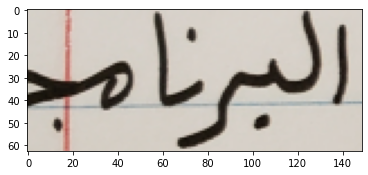

In [26]:
ninth_word = words_list[1]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

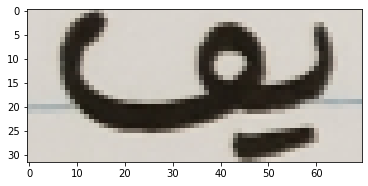

In [27]:
ninth_word = words_list[2]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


    -> Understanding text from natural images
    
    -> Text Recognition
    
    -> Text Localization

<img src="Text Detection in Natural Scene Images with Convolutional Neural Networks 1-9 screenshot.png">

In [40]:
from tensorflow import keras
model = keras.models.load_model('arabic_character_recognition.h5')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

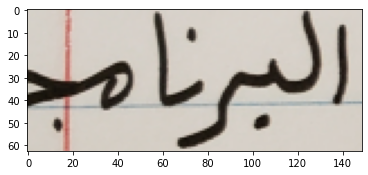

In [43]:
ninth_word = words_list[1]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

In [45]:
roi_9.shape

(63, 149, 3)

In [46]:
tt = roi_9

In [ ]:
Image.open()